<a href="https://colab.research.google.com/github/sheenayoosaf/100-days-of-code/blob/main/day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

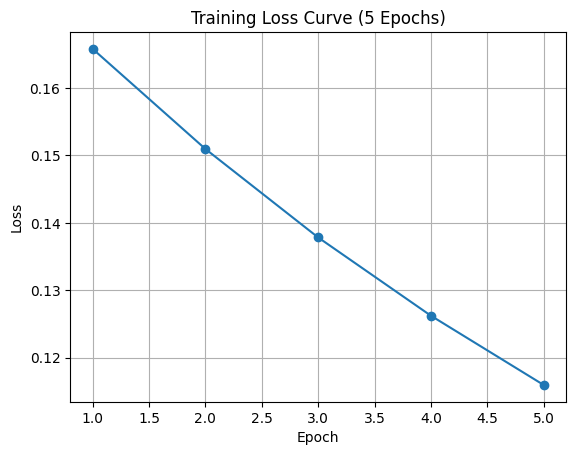

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation & derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Only one OR gate example: (1,1) -> 1
inputs = np.array([[1, 1]])
outputs = np.array([[1]])

# Initialize small network
np.random.seed(1)
weights_hidden = np.random.random((2, 1))
bias_hidden = np.random.random((1, 1))
weights_output = np.random.random((1, 1))
bias_output = np.random.random((1, 1))

learning_rate = 0.5
epochs = 5
loss_history = []

# Training
for epoch in range(epochs):
    hidden_input = np.dot(inputs, weights_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_output) + bias_output
    predicted_output = sigmoid(final_input)

    error = outputs - predicted_output
    loss = np.mean(error**2)
    loss_history.append(loss)

    d_pred_output = error * sigmoid_derivative(predicted_output)
    d_hidden_layer = (d_pred_output * weights_output.T) * sigmoid_derivative(hidden_output)

    weights_output += hidden_output.T.dot(d_pred_output) * learning_rate
    bias_output += np.sum(d_pred_output, keepdims=True) * learning_rate

    weights_hidden += inputs.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, keepdims=True) * learning_rate

# Plot loss graph
plt.figure()
plt.plot(range(1, epochs + 1), loss_history, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve (5 Epochs)")
plt.grid(True)
plt.show()
